In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.constants import pi, m_e, k, e, epsilon_0, hbar

# Parameters

In [3]:
# Metal conditions
mu = 7.0 # Chemical potential [eV]
#T = 300.0 # Temperature [K]
#w = 4.5 # Work function [eV]
#F = 10 # Field [eV/nm]

# Other parameters
Q = e / (16*pi*epsilon_0) # [eV·m]

In [135]:
def Find_Em():
    delta = 12.0 # Given in Kevins paper
    delta_E = 0.01
    
    E_min = mu - delta / beta_F(mu)
    E_max = mu + w + delta / beta_T()
    
    
    
    E_m = 1/2*(E_min + E_max)
    #print(E_m)
    #print(h_p(E_m, 1))
    #E_m = E_m - (delta_E/2)*(h_p(E_m, 1) - h_p(E_m, -1))/(h_p(E_m, 1) - 2*h_p(E_m, 0) + h_p(E_m, -1))
    return E_m

# Page 7: Equation for beta_F when E = mu
def beta_F_mu():
    beta_F = 2.05*np.sqrt(m_e)*Q**(1/4)/(hbar*F**(3/4))*(3.5963*sigma(y(mu)) - 0.76855*sigma_p(y(mu)))
    return beta_F

# Equation 28
def beta_F(E):
    y_v = y(E)
    s_v = sigma(y_v)
    sp_v = sigma_p(y_v)
    
    beta_F = 2*(m_e**(1/2)*Q**(1/4))/(hbar*F**(3/4))*((y_v + 3)*s_v - 2*y_v*(1-y_v**2)*sp_v)/(np.sqrt(y_v*(1+y_v)))
    return beta_F

def beta_T():
    beta_T = 1.0/(k*T)
    return beta_T

def sigma(y_):
    sigma_0 = pi/4
    sigma_1 = 0.76524
    sigma_2 = 0.73262
    sigma_3 = 0.67303
    sigma_4 = 2/3
    
    sigma = ((3*y_ - 1)*(2*y_*sigma_0 - (1 - y_)*sigma_4) + 8*y_*(1 - y_)*sigma_2) / (1 + y_)**2
    return sigma

# Note: The equation given in Kevins paper has two errors in it.
# To get the correct one there should be a minus sign in front of (12y - 4) not a plus
# and we need to swap sigma_2 and sigma_4.
def sigma_p(y_):
    sigma_0 = pi/4
    sigma_1 = 0.76524
    sigma_2 = 0.73262
    sigma_3 = 0.67303
    sigma_4 = 2/3
    
    sigma_p = 2*((7*y_ - 1)*sigma_0 + (5*y_ - 3)*sigma_4 - (12*y_ - 4)*sigma_2) / (1 + y_)**3
    #sigma_p = 2*((7*sigma_0 - 12*sigma_2 + 5*sigma_4)*y_ - sigma_0 + 4*sigma_2 - 3*sigma_4)/(1 + y_)**3
    return sigma_p

# Equation 20
def y(E):
    y = np.sqrt(4*F*Q)/(mu + w - E)
    return y

# Gammow factor \theta(E), see equation 23.
def theta(E):
    Gamm = 2*sigma(y(E))*Kappa(E)*L(E)
    return Gamm

# Equation 22
def Kappa(E):
    K = 2*m_e * (mu + w - E - np.sqrt(4*Q*F)) / (hbar**2)
    return K

# Equation 18
def L(E):
    in_sq = (mu + w - E)**2 - 4*Q*F
    print(in_sq)
    L = 1/F*np.sqrt(in_sq)
    return L

# Page 8
def h_p(E_m, p):
    delta_E = 0.01
    h = np.log(dJ(E_m + p*delta_E))
    return h

# Page 7
def dJ(E):
    dJ = D(E)*f(E)
    return dJ

# Page 5: Transmission Probability
def D(E):
    D_inv = 1 + np.exp(theta(E))
    return 1/D_inv

# Page 5: Supply function
def f(E):
    f = m_e/(pi*beta_T()*hbar**2) * np.log( 1 + np.exp(beta_T()*(mu - E)))
    return f

# Sigma function tests

In [140]:
F = 5.0E9 # Field [V/m] (5.0 eV/nm)
w = 4.5 # Work function [eV]
y_sigma_test = y(mu)
print('y = {}'.format(y_sigma_test)) # Value given in Kevins paper is y = 0.596 28
print('sigma = {}'.format(sigma(y_sigma_test))) # Value given in Kevins paper is sigma = 0.760 35
print('sigma_p = {}'.format(sigma_p(y_sigma_test))) # Value given in Kevins paper is sigma_p 

y = 0.5962774512033754
sigma = 0.7603480548781582
sigma_p = 0.08297153167372584


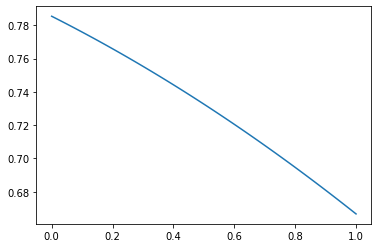

In [141]:
y_val = np.linspace(0.0, 1.0, 100)
x_val = (1-y_val)/(1+y_val)
sigma_val = sigma(y_val)

plt.plot(x_val, sigma_val)

In [142]:
print(mu)
E_min = mu - 12.0 / beta_F(mu)
E_max = mu + w + 12.0 / beta_T()
print(f'E_min {E_min} and E_max {E_max}')
print(beta_F(mu))
print(beta_F_mu())
print(beta_T())

7.0
E_min 6.9999999989545625 and E_max 11.5
11478449109.168346
11478580725.415592
2.4143243447168827e+20


# Plot of dJ

E_min 6.999999997972669 and E_max 11.5
[  5.76045467   1.53819293  -2.18850337  -5.41963423  -8.15519967
 -10.39519967 -12.13963424 -13.38850338 -14.14180708 -14.39954535]


/home/kristor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in sqrt
/home/kristor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in exp


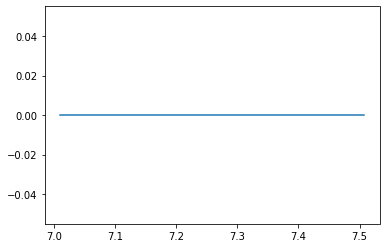

In [134]:
F = 10.0E9 # Field [V/m] (10 eV/nm)
w = 4.5 # Work function [eV]
T = 300.0 # Temperature  [K]
mu = 7.0 # Chemical potential [eV]

E_min = mu - 12.0 / beta_F(mu)
E_max = mu + w + 12.0 / beta_T()
print(f'E_min {E_min} and E_max {E_max}')

E = np.linspace(E_min+0.01, E_max-0.01, 10)
val = D(E)
plt.plot(E, val)

In [85]:
(mu + w - 7.7)**2 - 4*Q*F

0.04035464804945299

0.9969486348916096